In [8]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO
from deepface import DeepFace

In [9]:
random.seed(42)

In [17]:
images_dir = os.path.join('..', 'data', 'original_datasets', 'sample_images')
original_images_dir = os.path.join(images_dir, 'original')
cropped_images_dir = os.path.join(images_dir, 'cropped')
base_path = os.path.join(cropped_images_dir, 'face')

### Testing the pretrained deepface VGG model for face detection and face identification

#### Face detection

In [22]:
model = YOLO('../src/models/yolov11l-face.pt')

In [23]:
original_images_name = os.listdir(original_images_dir)
original_images_path = [os.path.join(original_images_dir, image) for image in original_images_name]
results = model(original_images_path)
original_images_name


0: 640x640 1 face, 422.3ms
1: 640x640 1 face, 422.3ms
2: 640x640 2 faces, 422.3ms
3: 640x640 8 faces, 422.3ms
Speed: 2.0ms preprocess, 422.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


['kohli2.jpg', 'kohli1.jpg', 'two_persons.jpg', 'people.jpg']

In [24]:
for result, image_name in zip(results, original_images_name):
    if os.path.exists(os.path.join(base_path, image_name)):
        os.remove(os.path.join(base_path, image_name))
    result.save_crop(save_dir=cropped_images_dir, file_name=image_name)

#### Face identification

In [25]:
img1_path = os.path.join(base_path, "kohli1.jpg")
img2_path = os.path.join(base_path, "kohli2.jpg")
print(img1_path, img2_path)
print(os.path.exists(img1_path), os.path.exists(img2_path))

result = DeepFace.verify(img1_path, img2_path)

result

../data/original_datasets/sample_images/cropped/face/kohli1.jpg ../data/original_datasets/sample_images/cropped/face/kohli2.jpg
True True


{'verified': True,
 'distance': 0.4880235507728071,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 0,
   'y': 13,
   'w': 120,
   'h': 145,
   'left_eye': (91, 70),
   'right_eye': (43, 70)},
  'img2': {'x': 0,
   'y': 5,
   'w': 47,
   'h': 47,
   'left_eye': None,
   'right_eye': None}},
 'time': 0.54}

In [26]:
base_path = os.path.join('..', 'data', 'original_datasets', 'FER_2013')
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

emotions = os.listdir(train_path)

print(f"Number of emotions: {len(emotions)}\nEmotions: {emotions}")

Number of emotions: 7
Emotions: ['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']


In [27]:
for emotion in emotions:
    print(f"Number of train and test images for {emotion}: {len(os.listdir(os.path.join(train_path, emotion)))}, {len(os.listdir(os.path.join(test_path, emotion)))}")

Number of train and test images for happy: 7215, 1774
Number of train and test images for sad: 4830, 1247
Number of train and test images for fear: 4097, 1024
Number of train and test images for surprise: 3171, 831
Number of train and test images for neutral: 4965, 1233
Number of train and test images for angry: 3995, 958
Number of train and test images for disgust: 436, 111


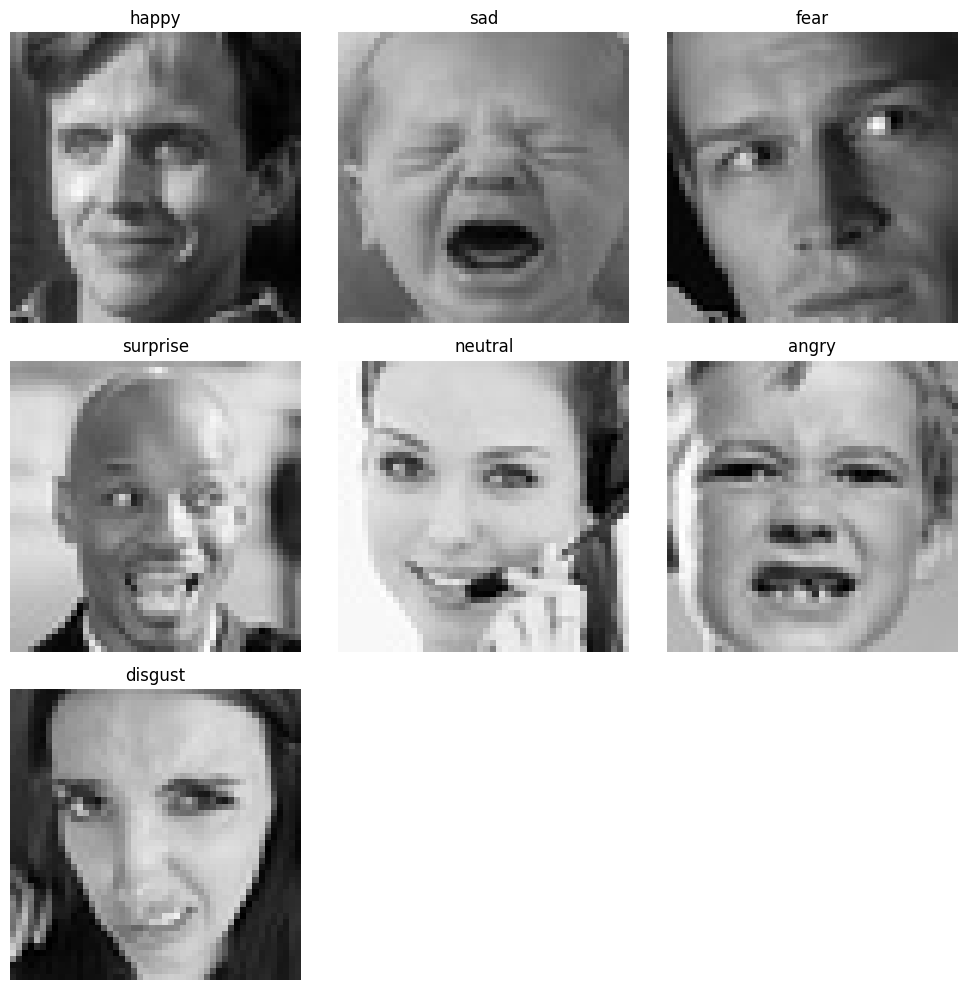

In [28]:
# showing one sample image from train dataset for each emotion
fig, axes = plt.subplots(nrows=(len(emotions) + 2) // 3, ncols=3, figsize=(10, 10))
axes = axes.flatten()

for ax, emotion in zip(axes, emotions):
    emotion_path = os.path.join(train_path, emotion)
    emotion_images = os.listdir(emotion_path)
    random_image = random.choice(emotion_images)
    image_path = os.path.join(emotion_path, random_image)
    image = Image.open(image_path).convert("RGB")  # Convert to RGB to show original color
    ax.imshow(image)
    ax.set_title(emotion)
    ax.axis('off')

# Hide any unused subplots
for ax in axes[len(emotions):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [29]:
from collections import Counter

for emotion in emotions:
    emotion_path = os.path.join(train_path, emotion)
    emotion_images = os.listdir(emotion_path)
    dimensions = []
    for image_name in emotion_images:
        image_path = os.path.join(emotion_path, image_name)
        with Image.open(image_path) as img:
            dimensions.append(img.size)
    dimension_counts = Counter(dimensions)
    print(f"Emotion: {emotion}")
    for dim, count in dimension_counts.items():
        print(f"  Dimension: {dim}, Count: {count}")

Emotion: happy
  Dimension: (48, 48), Count: 7215
Emotion: sad
  Dimension: (48, 48), Count: 4830
Emotion: fear
  Dimension: (48, 48), Count: 4097
Emotion: surprise
  Dimension: (48, 48), Count: 3171
Emotion: neutral
  Dimension: (48, 48), Count: 4965
Emotion: angry
  Dimension: (48, 48), Count: 3995
Emotion: disgust
  Dimension: (48, 48), Count: 436
